In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_5_descriptive = get_prompt("descriptive", 5)
prompt_5_natural = get_prompt("natural", 5)

prompt_5_descriptive, prompt_5_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Simulate for 1ps at 300 K. 4. Compute the RMSD. 5. Compute the radius of gyration over time.',
 'Simulate 1LYZ for 1ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure, and compute the RMSD and radius of gyration of the simulation.')

In [3]:
llm_model = "claude-3-opus-20240229"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_5_descriptive)

Thought: To complete the tasks, I will need to download the PDB file, analyze its secondary structure, run a short simulation, and compute RMSD and radius of gyration. I will start by downloading the PDB file.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file downloaded, I can analyze its secondary structure using the ComputeDSSP tool.

Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_004352",
    "target_frames": "all"
  }
}
```

Thought: The secondary structure analysis is complete. Next I will set up and run a short 1ps simulation at 300K using the SetUpandRunFunction tool.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_004352",
    "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1.0 * nanomet

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_004352: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_004352
 rec0_004357: dssp values for trajectory with id: 1LYZ_004352
 1LYZ_004420: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_004434: Initial positions for simulation sim0_004434
 sim0_004434: Basic Simulation of Protein 1LYZ_004420
 rec0_004438: Simulation trajectory for protein 1LYZ_004420 and simulation sim0_004434
 rec1_004438: Simulation state log for protein 1LYZ_004420 and simulation sim0_004434
 rec2_004438: Simulation pdb frames for protein 1LYZ_004420 and simulation sim0_004434
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_005100: RMSD plot for 1LYZ
 rgy_rec0_004438: Radii of gyration per frame for rec0_004438
 fig0_005107: Plot of radii of gyration over time for rec0_004438


In [8]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_004352"))

In [9]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_004352", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [10]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("sim0_004434")
top_path_1 = registry_1.get_mapped_path("top_sim0_004434")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

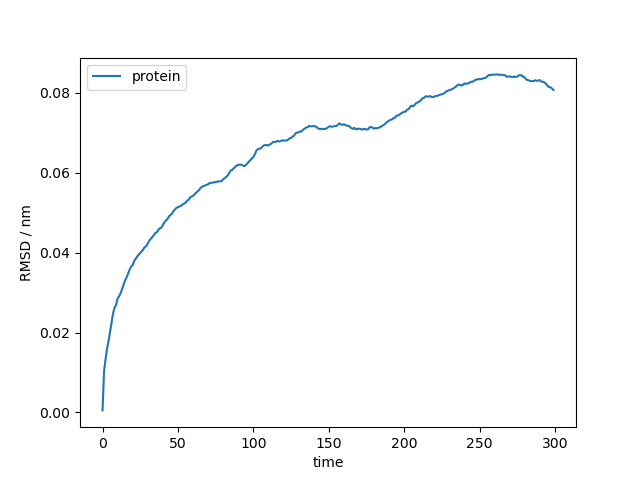

In [11]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_005100'))

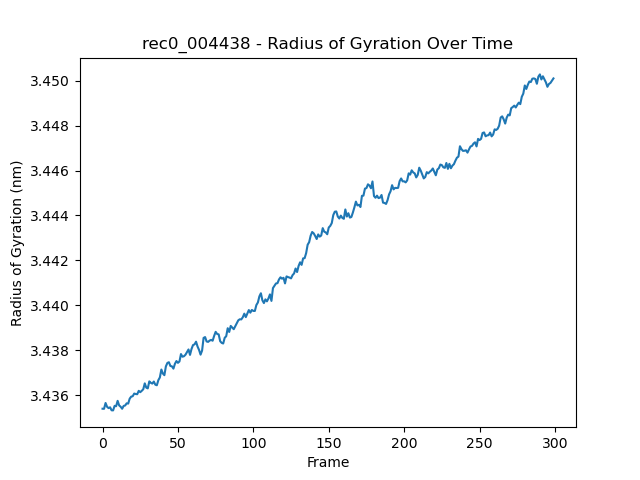

In [12]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_005107'))

In [13]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_5_natural)

Thought: To simulate 1LYZ, I first need to download the PDB file. I can use the PDBFileDownloader tool to get the PDB file.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I can use the ComputeDSSP tool to get the secondary structure assignments for the downloaded structure.

Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": null,
    "top_file": "1LYZ_005415",
    "target_frames": "first"
  }
}
```



/Users/samanthacox/Desktop/md-agent/mdagent/utils/data_handling.py:49: UserWarning: Trajectory File ID is not provided but is not required; loading MDTrajectory from topology 1LYZ_005415 only.
  warnings.warn(


Thought: Now that I have the secondary structure assignments, I can set up and run a short 1ps simulation at 300K using the SetUpandRunFunction tool. I'll specify the PDB file ID, forcefield files, and simulation parameters.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_005415",
    "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME", 
      "nonbondedCutoff": "1.0 * nanometers",
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "ewaldErrorTolerance": 0.0005,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle", 
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NVT",
      "Number of Steps": 500,
      "record_interva

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [14]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_005415: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_005415
 rec0_005421: dssp values for trajectory with id: None
 1LYZ_005446: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_005502: Initial positions for simulation sim0_005502
 sim0_005502: Basic Simulation of Protein 1LYZ_005446
 rec0_005508: Simulation trajectory for protein 1LYZ_005446 and simulation sim0_005502
 rec1_005508: Simulation state log for protein 1LYZ_005446 and simulation sim0_005502
 rec2_005508: Simulation pdb frames for protein 1LYZ_005446 and simulation sim0_005502
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_010028: RMSD plot for 1LYZ
 rgy_rec0_005508: Radii of gyration per frame for rec0_005508
 fig0_010035: Plot of radii of gyration over time for rec0_005508


In [17]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_005415"))

In [18]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_005415", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [19]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_005508")
top_path_2 = registry_2.get_mapped_path("top_sim0_005502")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

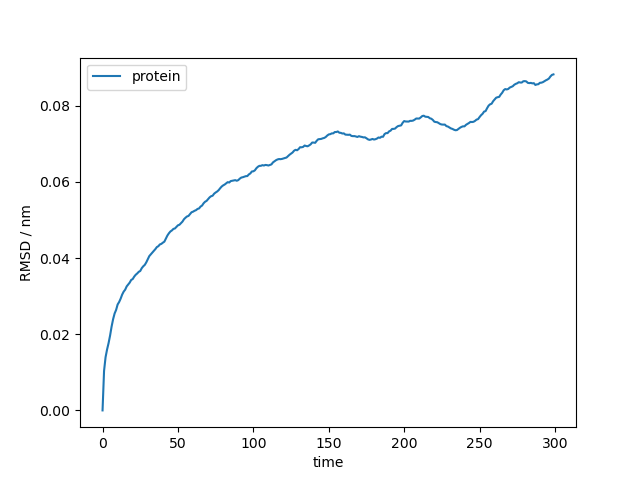

In [20]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_010028'))

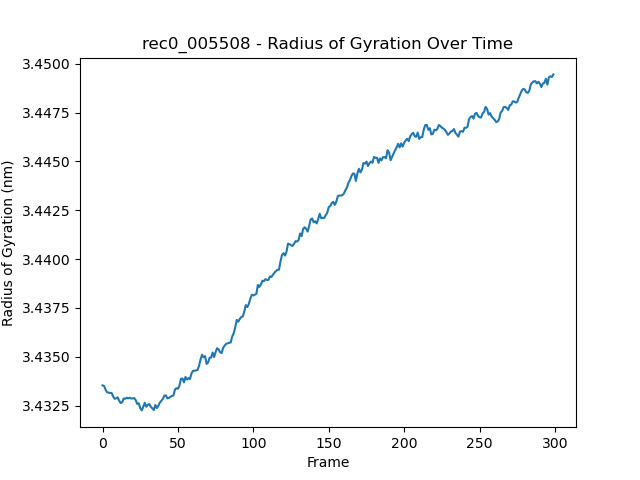

In [21]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_010035'))